In [386]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


import board

import time

# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


import tqdm as tqdm

In [128]:
start_time = time.time()
n = board.experiment()
print("--- %s seconds ---" % (time.time() - start_time))
print(n)
print(np.sum(n))

--- 0.06040239334106445 seconds ---
[  0.   2.   3.  15.  16.  25.  44.  68.  90.  86.  90. 101.  86.  86.
  87.  64.  43.  37.  27.  10.  10.   6.   2.   2.   0.   0.   0.   0.
   0.   0.   0.   0.]
1000.0


# Task 1: Simulator

In [214]:
nRows = 31
def simulator(alpha=0, s=0, n=1000):
    nslots = nRows+1 # Number of positions for marble in last row
    counts = np.zeros(nslots)    
    for b in range(n):
        nRight = 0
        M = 0
        rands = np.random.rand(nRows)
        for i in range(nRows):
            rand = rands[i]
            thres = 0.5 + alpha*M + s
            if rand <= thres:
                nRight += 1
                M = -0.5
            else:
                M = 0.5
        counts[nRight] += 1
    return counts
    
start_time = time.time()
print(simulator())
print("--- %s seconds ---" % (time.time() - start_time))
    
    

[  0.   0.   0.   0.   0.   0.   1.   0.   2.   7.  17.  42.  60.  98.
 126. 152. 137. 150.  88.  55.  35.  17.   9.   3.   1.   0.   0.   0.
   0.   0.   0.   0.]
--- 0.013483047485351562 seconds ---


In [392]:
nData = 10000
alphaData = np.random.rand(nData)*0.5
sData = np.random.rand(nData)*0.5 - 0.25
y = np.zeros((nData, 2))
X = np.zeros((nData, nRows+1))

for i in range(nData):
    alpha = alphaData[i]
    s = sData[i]
    
    y[i,0] = alpha
    y[i,1] = s
    X[i,:] = simulator(alpha, s)

# Task 2: NN

In [393]:
def nn_model(X):
    input_shape = (X.shape[1],)
    model = keras.Sequential()
    # model.add(keras.Input(shape=input_shape))
    model.add(layers.Dense(32, input_shape=input_shape, activation="relu", kernel_initializer='random_normal'))
    model.add(layers.Dense(16, activation="relu", kernel_initializer='random_normal'))
    model.add(layers.Dense(8, activation="relu", kernel_initializer='random_normal'))
    # model.add(layers.Dense(3, activation="relu"))
    model.add(layers.Dense(2))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model
model = nn_model(X)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 18        
Total params: 1,738
Trainable params: 1,738
Non-trainable params: 0
_________________________________________________________________


In [394]:
history = model.fit(x=X,
                    y=y,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.7,
                    verbose=0)

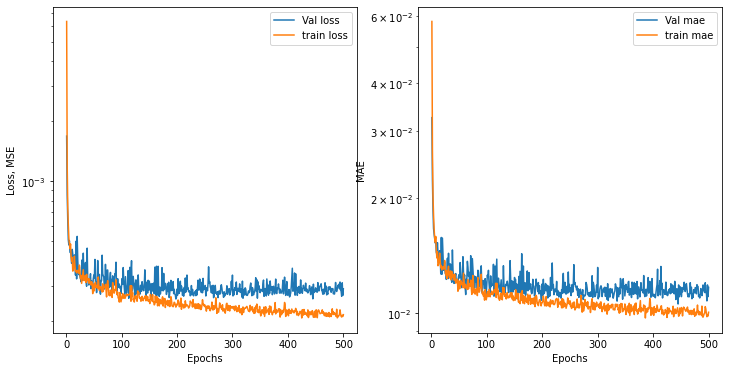

0.011682036332786083


In [395]:
# Plot training history
mae_history = history.history
epochs = range(1, len(mae_history['val_mae'])+1)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].plot(epochs, mae_history['val_loss'], label='Val loss')
axs[0].plot(epochs, mae_history['loss'], label='train loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss, MSE')
axs[0].legend(loc='best')
axs[0].set_yscale('log')

axs[1].plot(epochs, mae_history['val_mae'], label='Val mae')
axs[1].plot(epochs, mae_history['mae'], label='train mae')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('MAE')
axs[1].legend(loc='best')
axs[1].set_yscale('log')
plt.show()

print(mae_history['val_mae'][-1])

In [397]:
# Predict on an example
test_X = simulator(alpha=0.4, s=-0.2)
print(test_X.reshape(1,32))
model.predict(test_X.reshape(1,32))

[[  0.   0.   0.   0.   0.   2.   6.  16.  42. 128. 166. 217. 217. 127.
   62.  13.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]]


array([[ 0.40618607, -0.19729686]], dtype=float32)